In [9]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
from pandas import Timestamp
from datetime import datetime, timedelta
import json
df = pd.read_csv("data_initial_complet_processed.csv", encoding='latin-1',sep=';',header=None)

C:\Users\rafat\AppData\Local\Temp\ipykernel_13196\4129148714.py:7: DtypeWarning: Columns (0,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data_initial_complet_processed.csv", encoding='latin-1',sep=';',header=None)


In [10]:
#Garder C et K
#Enlever 28 14 15 
#Enlever durée 0
#Enlever mode d'entrée en urgence 85

In [11]:
#Nom des colonnes
df.columns = df.iloc[0]
df = df.drop(0)

In [12]:
df['date_entree_rss'][1]

'26/12/2019'

In [14]:
#On garde uniquement les lignes qui nous intéressent
df1 = df[~(df['duree_totale']=='0')]
df2 = df1[~(df1['duree_totale']==0)]
df3 = df2[df1['type_ghm'].isin(['C','K'])]
df4 = df3[~(df3['mode_entree_rss']=='85')]
df5 = df4[~(df4['CMD'].isin(['28','14','15']))]

C:\Users\rafat\AppData\Local\Temp\ipykernel_13196\380389825.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2[df1['type_ghm'].isin(['C','K'])]


In [15]:
groupes_cmd = {'01': ['Système Nerveux',0],
               '02': ['Oeil',0],
               '03': ['Oreilles, du nez, de la gorge, de la bouche et des dents',0],
               '04': ['Appareil respiratoire',0],
               '05': ['Appareil circulatoire',0],
               '06': ['Tube digestif',0],
               '07': ['Système hépatobiliaire et du pancréas',0],
               '08': ['Appareil musculosquelettique et du tissu conjonctif',0],
               '09': ['Peau, des tissus sous-cutanés et des seins',0],
               '10': ['Endocriniennes, métaboliques et nutritionnelles',0],
               '11': ['Rein et des voies urinaires',0],
               '12': ['Appareil génital masculin',0],
               '13': ['Appareil génital féminin',0],
               '14': ['Grossesses pathologiques, accouchements et affections du post-partum',0],
               '15': ['Nouveau-nés, prématurés et affections de la période périnatale',0],
               '16': ['Sang et des organes hématopoïétiques',0],
               '17': ['Myéloprolifératives et tumeurs de siège imprécis ou diffus',0],
               '18': ['Maladies infectieuses et parasitaires',0],
               '19': ['Maladies et troubles mentaux',0],
               '20': ['Troubles mentaux organiques liés à labsorption de drogues ou induits par celles-ci',0],
               '21': ['Traumatismes, allergies et empoisonnements',0],
               '22': ['Brûlures',0],
               '23': ['Facteurs influant sur létat de santé et autres motifs de recours aux services de santé',0],
               '24': ['Séjours de moins de 2 jours',0],
               '25': ['Maladies dues à une infection par le VIH',0],
               '26': ['Traumatismes multiples graves',0],
               '27': ['Transplantations dorganes',0],
               '28': ['Séances',0],
               '90': ['Erreurs et autres séjours inclassables',0]}

In [16]:
categorie_majeure = []
for i in df5.index:
    categorie_majeure.append(df5['GHM'][i][:2])
df5.insert(11, "categorie_majeure", categorie_majeure, True)  

In [17]:
df_01 = df5[df5['categorie_majeure']=='03']

dataCount = df_01['date_entree_rss'].value_counts()

df_lits_dates_projection_exp_01 = pd.DataFrame(dataCount)
df_lits_dates_projection_exp_01 = df_lits_dates_projection_exp_01.reset_index()
df_lits_dates_projection_exp_01 = df_lits_dates_projection_exp_01.rename(columns={'date_entree_rss': 'c'})
df_lits_dates_projection_exp_01 = df_lits_dates_projection_exp_01.rename(columns={'index': 'date'})
df_lits_dates_projection_exp_01

df_lits_dates_projection_exp_01.to_json('cmd_02.json', orient='records')

In [49]:
df_01

,id,date_entree_rss,mode_entree_rss,date_sortie_rss,mode_sortie_rss,duree_totale,sexe,age,CMD,GHM,type_ghm,categorie_majeure,severite,dp_rss,das_rss,actes_rss,liste_actes_classant_rss,acte_classant,date_acte_classant


In [18]:
json_cmd = []

for code in groupes_cmd:
    df_01 = df5[df5['categorie_majeure']==code]

    dates_01 = {}
    date = datetime.strptime('23/01/2019', "%d/%m/%Y")
    for i in range ((datetime.strptime('30/12/2020', "%d/%m/%Y") - datetime.strptime('23/01/2019', "%d/%m/%Y")).days + 1):
        dates_01[date] = 0
        date = date + timedelta(days = 1)
    #print(dates_01)
    
    for i in df_01.index:
        dates_01[datetime.strptime(df_01['date_acte_classant'][i], "%d/%m/%Y")] += 1
    
    dates_02 = {}
    date = datetime.strptime('23/01/2019', "%d/%m/%Y")
    semaine = [0,0,0,0,0,0]
    for i in dates_01:
        semaine.append(dates_01[i])
        if pd.Timestamp(date).day_name() == 'Saturday' or pd.Timestamp(date).day_name() == "Sunday":
            dates_02[date] = round(max(semaine[-7:])*0.2)
        else:
            dates_02[date] = max(semaine[-7:])
        date = date + timedelta(days = 1)
    #dataCount = df_01['date_entree_rss'].value_counts()
    
    df_lits_dates_projection_exp_01 = pd.DataFrame.from_dict(dates_02, orient='index')
    df_lits_dates_projection_exp_01 = df_lits_dates_projection_exp_01.reset_index()
    df_lits_dates_projection_exp_01 = df_lits_dates_projection_exp_01.rename(columns={0: 'c'})
    df_lits_dates_projection_exp_01 = df_lits_dates_projection_exp_01.rename(columns={'index': 'date'})
    df_lits_dates_projection_exp_01.pop('date')
    calendrier = []
    date = datetime.strptime('23/01/2019', "%d/%m/%Y")
    for i in df_lits_dates_projection_exp_01.index:
        date_str = date.strftime("%Y-%m-%d")
        #print(date_str)
        calendrier.append(date_str)
        #df_lits_dates_projection_exp_01['date'][i] = date_str
        date = date + timedelta(days = 1)
        #df_lits_dates_projection_exp_01['date'][i] = date[-4:]+date[2:6]+date[:2]
    df_lits_dates_projection_exp_01.insert(0, "date", calendrier, True)  
    #df_lits_dates_projection_exp_01.to_json('cmd_02.json', orient='records')

    json_cmd.append({'cmd': code, 'data': pd.DataFrame.to_json(df_lits_dates_projection_exp_01, orient="records")})

In [19]:
json_cmd

[{'cmd': '01',
  'data': '[{"date":"2019-01-23","c":0},{"date":"2019-01-24","c":0},{"date":"2019-01-25","c":0},{"date":"2019-01-26","c":0},{"date":"2019-01-27","c":0},{"date":"2019-01-28","c":0},{"date":"2019-01-29","c":0},{"date":"2019-01-30","c":0},{"date":"2019-01-31","c":0},{"date":"2019-02-01","c":0},{"date":"2019-02-02","c":0},{"date":"2019-02-03","c":0},{"date":"2019-02-04","c":0},{"date":"2019-02-05","c":0},{"date":"2019-02-06","c":0},{"date":"2019-02-07","c":0},{"date":"2019-02-08","c":0},{"date":"2019-02-09","c":0},{"date":"2019-02-10","c":0},{"date":"2019-02-11","c":0},{"date":"2019-02-12","c":0},{"date":"2019-02-13","c":0},{"date":"2019-02-14","c":0},{"date":"2019-02-15","c":0},{"date":"2019-02-16","c":0},{"date":"2019-02-17","c":0},{"date":"2019-02-18","c":0},{"date":"2019-02-19","c":0},{"date":"2019-02-20","c":0},{"date":"2019-02-21","c":0},{"date":"2019-02-22","c":0},{"date":"2019-02-23","c":0},{"date":"2019-02-24","c":0},{"date":"2019-02-25","c":0},{"date":"2019-02-26",

In [20]:
df_lits_dates_projection_exp_01

,date,c
0,2019-01-23,0
1,2019-01-24,0
2,2019-01-25,0
3,2019-01-26,0
4,2019-01-27,0
...,...,...
703,2020-12-26,0
704,2020-12-27,0
705,2020-12-28,0
706,2020-12-29,0


## Plot chirurgies

In [32]:
df_json = json.loads(json_cmd[0]['data'])
df_json[0]

capacite = {}
for dictio in json_cmd:
    capacite_jours = []
    for dict_data in json.loads(dictio['data']):
        capacite_jours.append(dict_data['c'])
    capacite[dictio['cmd']] = capacite_jours

{'01': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

<AxesSubplot:>

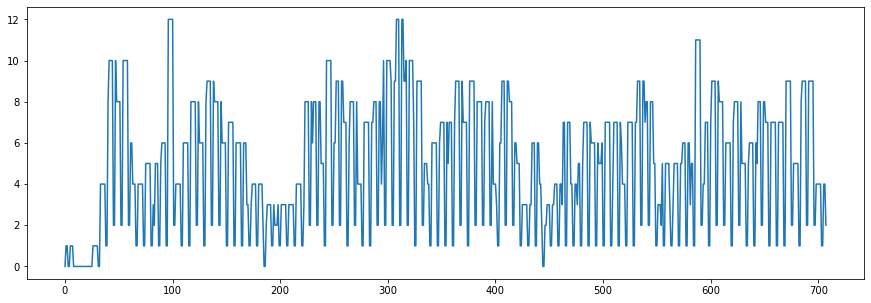

In [48]:
plt.figure(figsize = (15,5))
pd.DataFrame(capacite['06'])[0].plot()

In [16]:
df5['duree_totale'] = df5['duree_totale'].astype('int')

C:\Users\rafat\AppData\Local\Temp\ipykernel_3920\2439989168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['duree_totale'] = df5['duree_totale'].astype('int')
